### Importing modules

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
from datetime import date, timedelta   
import nltk
%matplotlib inline

In [83]:
pd.set_option("display.max_colwidth", -1)

pd.set_option("display.max_rows", None, "display.max_columns", None);

<ipython-input-83-a7a1bba9576b>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


### 1. Data ghathring

In [146]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210501, 210508, 210515,210529,210605,210612,210619,210626,210703,210710,210717,210724,210731]
df = get_data(week_nums)

### 2. Data Exploring

In [147]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00  59 ST   NQR456W  BMT      04/24/2021  00:00:00   
1  A002  R051  02-00-00  59 ST   NQR456W  BMT      04/24/2021  04:00:00   
2  A002  R051  02-00-00  59 ST   NQR456W  BMT      04/24/2021  08:00:00   
3  A002  R051  02-00-00  59 ST   NQR456W  BMT      04/24/2021  12:00:00   
4  A002  R051  02-00-00  59 ST   NQR456W  BMT      04/24/2021  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  7561288   
1  REGULAR  7561295   
2  REGULAR  7561302   
3  REGULAR  7561336   
4  REGULAR  7561426   

   EXITS                                                                 
0  2582898                                                               
1  2582903                                                               
2  2582918                                                               
3  2582977                                                               
4  2583008

In [148]:
df.tail()

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
209458  TRAM2  R469  00-05-01  RIT-ROOSEVELT  R        RIT      07/30/2021   
209459  TRAM2  R469  00-05-01  RIT-ROOSEVELT  R        RIT      07/30/2021   
209460  TRAM2  R469  00-05-01  RIT-ROOSEVELT  R        RIT      07/30/2021   
209461  TRAM2  R469  00-05-01  RIT-ROOSEVELT  R        RIT      07/30/2021   
209462  TRAM2  R469  00-05-01  RIT-ROOSEVELT  R        RIT      07/30/2021   

            TIME     DESC  ENTRIES  \
209458  05:00:00  REGULAR  5554      
209459  09:00:00  REGULAR  5554      
209460  13:00:00  REGULAR  5554      
209461  17:00:00  REGULAR  5554      
209462  21:00:00  REGULAR  5554      

        EXITS                                                                 
209458  589                                                                   
209459  589                                                                   
209460  589                                                                   
209461  590                                                                   
209462  591

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [150]:
df.describe()

ENTRIES  \
count  2.721477e+06   
mean   4.187829e+07   
std    2.189091e+08   
min    0.000000e+00   
25%    2.168880e+05   
50%    1.419220e+06   
75%    6.049660e+06   
max    2.147430e+09   

       EXITS                                                                 
count  2.721477e+06                                                          
mean   3.352181e+07                                                          
std    1.927547e+08                                                          
min    0.000000e+00                                                          
25%    9.585300e+04                                                          
50%    8.587600e+05                                                          
75%    3.980241e+06                                                          
max    2.122941e+09

In [151]:
df.shape

(2721477, 11)

In [152]:
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64 
EXITS                                                                   int64 
dtype: object

In [153]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [154]:
df['STATION'].value_counts()

34 ST-PENN STA     55619
FULTON ST          52376
GRD CNTRL-42 ST    48482
23 ST              39852
86 ST              35390
CANAL ST           31660
59 ST              30635
CHAMBERS ST        30080
34 ST-HERALD SQ    29488
ATL AV-BARCLAY     27852
42 ST-PORT AUTH    27850
14 ST              27831
WALL ST            26869
PATH NEW WTC       23350
TIMES SQ-42 ST     23142
125 ST             22761
14 ST-UNION SQ     22396
59 ST COLUMBUS     22352
CORTLANDT ST       21346
28 ST              21319
JAY ST-METROTEC    20863
96 ST              20222
CHURCH AV          20215
161/YANKEE STAD    20176
47-50 STS ROCK     19677
50 ST              19670
METS-WILLETS PT    19663
WTC-CORTLANDT      19094
LEXINGTON AV/53    17469
34 ST-HUDSON YD    16399
KINGS HWY          16394
BOWLING GREEN      15825
72 ST              15823
BOROUGH HALL       14716
8 AV               14200
FLUSHING-MAIN      13811
JAMAICA 179 ST     13649
ST. GEORGE         13639
49 ST              13615
JOURNAL SQUARE     13393


In [155]:
df['TIME'].value_counts()

08:00:00    232912
12:00:00    232912
16:00:00    232900
00:00:00    232900
04:00:00    232863
20:00:00    232786
01:00:00    170947
17:00:00    170943
21:00:00    170918
13:00:00    170902
05:00:00    170854
09:00:00    170786
22:00:00    10296 
14:00:00    10295 
18:00:00    10289 
10:00:00    10288 
06:00:00    10278 
02:00:00    10277 
23:00:00    3548  
19:00:00    3547  
11:00:00    3547  
15:00:00    3546  
07:00:00    3545  
03:00:00    3537  
00:22:00    3366  
12:22:00    3365  
20:22:00    3363  
08:22:00    3363  
04:22:00    3363  
16:22:00    3358  
18:30:00    1825  
06:30:00    1821  
14:30:00    1820  
02:30:00    1816  
10:30:00    1815  
22:30:00    1814  
08:30:00    1098  
12:30:00    1094  
20:30:00    1094  
00:30:00    1093  
16:30:00    1090  
04:30:00    1090  
05:00:01    157   
10:55:20    38    
18:43:20    34    
11:43:26    33    
22:45:57    28    
15:43:28    28    
16:09:16    27    
11:50:05    27    
13:00:01    27    
15:01:13    27    
11:57:57    

In [156]:
df['DATE'].value_counts().sort_index()

04/24/2021    29924
04/25/2021    29844
04/26/2021    29803
04/27/2021    29973
04/28/2021    29817
04/29/2021    29800
04/30/2021    29809
05/01/2021    29818
05/02/2021    29789
05/03/2021    29814
05/04/2021    30032
05/05/2021    29819
05/06/2021    29997
05/07/2021    29906
05/08/2021    29826
05/09/2021    29813
05/10/2021    29931
05/11/2021    29849
05/12/2021    29877
05/13/2021    29982
05/14/2021    29761
05/22/2021    29807
05/23/2021    29789
05/24/2021    29828
05/25/2021    29855
05/26/2021    29834
05/27/2021    29905
05/28/2021    29894
05/29/2021    29939
05/30/2021    29812
05/31/2021    29997
06/01/2021    29889
06/02/2021    29870
06/03/2021    29962
06/04/2021    30062
06/05/2021    29918
06/06/2021    29790
06/07/2021    30029
06/08/2021    30151
06/09/2021    29880
06/10/2021    29896
06/11/2021    29842
06/12/2021    29907
06/13/2021    29831
06/14/2021    29852
06/15/2021    29989
06/16/2021    29910
06/17/2021    29959
06/18/2021    29812
06/19/2021    29876


In [157]:
df['UNIT'].value_counts()

R549    37157
R057    27852
R014    27263
R540    25953
R029    25516
R550    23789
R170    22396
R084    22352
R088    21346
R028    21328
R046    20271
R195    20176
R012    20158
R020    19677
R328    19663
R001    19368
R305    19094
R541    18373
R022    18022
R011    17496
R044    16925
R072    16399
R127    15937
R018    15020
R043    14871
R163    14740
R108    14716
R051    14191
R175    14171
R359    14166
R055    13811
R293    13757
R131    13665
R019    13649
R070    13639
R081    13615
R552    13393
R047    13112
R032    13094
R141    13094
R140    13093
R248    13092
R179    13080
R049    12616
R168    12558
R041    12555
R164    12543
R045    12364
R017    12009
R452    12004
R027    11998
R176    11980
R025    11496
R021    11482
R023    11466
R015    11450
R031    11293
R110    11017
R158    10997
R461    10904
R080    10891
R151    10891
R543    10860
R035    10682
R142    10459
R013    10411
R143    10402
R544    10396
R463    10379
R139    10376
R319    10369
R010  

In [158]:
df['DIVISION'].value_counts()

IRT    978201
IND    949508
BMT    602095
PTH    168776
SRT    17461 
RIT    5436  
Name: DIVISION, dtype: int64

In [159]:
df['DESC'].value_counts()

REGULAR       2709955
RECOVR AUD    11522  
Name: DESC, dtype: int64

In [160]:
df['SCP'].value_counts()

00-00-00    252686
00-00-01    250981
00-00-02    223093
00-00-03    112618
00-03-00    99010 
00-03-01    94371 
01-00-00    85413 
01-00-01    85099 
01-00-02    82317 
00-05-00    74635 
00-05-01    72425 
00-06-00    64940 
00-00-04    64871 
00-03-02    60642 
01-06-00    58256 
01-06-01    52045 
00-06-01    51143 
01-00-03    37480 
01-05-00    37390 
01-05-01    36748 
00-03-03    31458 
00-00-05    28230 
01-03-00    27972 
01-03-01    24693 
02-00-00    23957 
01-00-04    23902 
02-00-01    22860 
00-06-02    22440 
02-00-02    20712 
01-03-02    19099 
01-06-02    16948 
00-03-04    16313 
00-00-06    15673 
02-00-03    15257 
00-05-02    13600 
00-00-07    12969 
02-06-00    12441 
01-03-03    12248 
02-06-01    11450 
02-00-04    11435 
01-00-05    10859 
00-06-03    10432 
02-03-01    10375 
02-03-00    10373 
02-05-00    9794  
00-05-03    9688  
02-05-01    9269  
03-00-00    8160  
01-03-04    7866  
03-00-01    7611  
00-03-05    7606  
03-00-02    7582  
02-03-02    

In [161]:
df.groupby(['DIVISION', 'STATION']).size()

DIVISION  STATION        
BMT       1 AV               13092
          104 ST             2188 
          111 ST             2166 
          121 ST             3234 
          14 ST-UNION SQ     14739
          18 AV              6056 
          20 AV              3890 
          23 ST              7637 
          25 AV              1638 
          25 ST              3274 
          28 ST              4907 
          3 AV               3280 
          30 AV              3836 
          34 ST-HERALD SQ    8190 
          36 AV              3276 
          36 ST              3258 
          39 AV              3384 
          45 ST              2228 
          49 ST              13615
          4AV-9 ST           6045 
          5 AV/59 ST         7648 
          50 ST              1644 
          53 ST              4360 
          55 ST              1636 
          57 ST-7 AV         10891
          59 ST              13164
          6 AV               2720 
          7 AV               

### 3. Data Cleaning

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [163]:
df.columns=[column.strip()for column in df.columns]

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 249.2+ MB


#### Rename columns

In [165]:
df.rename({'C/A': 'control_area', 'UNIT': 'unit','SCP':'subunit_channel_position','STATION':'station','LINENAME':'line_name','DIVISION':'division','DATE':'date','TIME':'time','DESC':'description','ENTRIES':'entries','EXITS':'exits'}, axis=1,inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   control_area              object
 1   unit                      object
 2   subunit_channel_position  object
 3   station                   object
 4   line_name                 object
 5   division                  object
 6   date                      object
 7   time                      object
 8   description               object
 9   entries                   int64 
 10  exits                     int64 
dtypes: int64(2), object(9)
memory usage: 249.2+ MB


In [167]:
df.shape[0]

2721477

In [168]:
df.isna().sum()

control_area                0
unit                        0
subunit_channel_position    0
station                     0
line_name                   0
division                    0
date                        0
time                        0
description                 0
entries                     0
exits                       0
dtype: int64

#### No null values

In [169]:
df =df[df['description'] != 'RECOVR AUD' ]

#### Drop duplicate

In [170]:
df.drop_duplicates(inplace=True)

In [171]:
df['description'].value_counts()

REGULAR    2709955
Name: description, dtype: int64

In [172]:
df.description.value_counts()

REGULAR    2709955
Name: description, dtype: int64

In [173]:
df["date_time"] = pd.to_datetime(df.date + " " + df.time, 
                                            format="%m/%d/%Y %H:%M:%S")

In [174]:
#Check that there is no duplicate
(df
 .groupby(["control_area", "unit", "subunit_channel_position", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)


control_area  unit subunit_channel_position         station  \
0        A002         R051  02-00-00                 59 ST            
1806631  R138         R293  00-03-02                 34 ST-PENN STA   
1806633  R138         R293  00-03-02                 34 ST-PENN STA   
1806634  R138         R293  00-03-02                 34 ST-PENN STA   
1806635  R138         R293  00-03-02                 34 ST-PENN STA   

                  date_time  entries  
0       2021-04-24 00:00:00  1        
1806631 2021-06-03 22:00:00  1        
1806633 2021-06-04 06:00:00  1        
1806634 2021-06-04 10:00:00  1        
1806635 2021-06-04 10:28:37  1

#### No more duplicate

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709955 entries, 0 to 209462
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   control_area              object        
 1   unit                      object        
 2   subunit_channel_position  object        
 3   station                   object        
 4   line_name                 object        
 5   division                  object        
 6   date                      object        
 7   time                      object        
 8   description               object        
 9   entries                   int64         
 10  exits                     int64         
 11  date_time                 datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 268.8+ MB


In [176]:
df.head()

control_area  unit subunit_channel_position station line_name division  \
0  A002         R051  02-00-00                 59 ST   NQR456W   BMT       
1  A002         R051  02-00-00                 59 ST   NQR456W   BMT       
2  A002         R051  02-00-00                 59 ST   NQR456W   BMT       
3  A002         R051  02-00-00                 59 ST   NQR456W   BMT       
4  A002         R051  02-00-00                 59 ST   NQR456W   BMT       

         date      time description  entries    exits           date_time  
0  04/24/2021  00:00:00  REGULAR     7561288  2582898 2021-04-24 00:00:00  
1  04/24/2021  04:00:00  REGULAR     7561295  2582903 2021-04-24 04:00:00  
2  04/24/2021  08:00:00  REGULAR     7561302  2582918 2021-04-24 08:00:00  
3  04/24/2021  12:00:00  REGULAR     7561336  2582977 2021-04-24 12:00:00  
4  04/24/2021  16:00:00  REGULAR     7561426  2583008 2021-04-24 16:00:00

#### Make a turnstile dataframe

In [177]:
turnstiles_daily = (df
                        .groupby(["control_area", "unit", "subunit_channel_position", "station", "date"],as_index=False)
                        .entries.first())

In [178]:
turnstiles_daily.head()

control_area  unit subunit_channel_position station        date  entries
0  A002         R051  02-00-00                 59 ST   04/24/2021  7561288
1  A002         R051  02-00-00                 59 ST   04/25/2021  7561638
2  A002         R051  02-00-00                 59 ST   04/26/2021  7561870
3  A002         R051  02-00-00                 59 ST   04/27/2021  7562365
4  A002         R051  02-00-00                 59 ST   04/28/2021  7562953

#### adding a new columns in turnstile dataframe

In [179]:
turnstiles_daily[["pre_date", "pre_entries"]] = (turnstiles_daily
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["date", "entries"]
                                                       .apply(lambda grp: grp.shift(1)))
#apply the shift function by 1

<ipython-input-179-0df0482dca0c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["pre_date", "pre_entries"]] = (turnstiles_daily


In [180]:
turnstiles_daily["diff"] = (turnstiles_daily
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["entries"]
                                                       .apply(lambda x: x.diff()))

In [181]:
turnstiles_daily.head()

control_area  unit subunit_channel_position station        date  entries  \
0  A002         R051  02-00-00                 59 ST   04/24/2021  7561288   
1  A002         R051  02-00-00                 59 ST   04/25/2021  7561638   
2  A002         R051  02-00-00                 59 ST   04/26/2021  7561870   
3  A002         R051  02-00-00                 59 ST   04/27/2021  7562365   
4  A002         R051  02-00-00                 59 ST   04/28/2021  7562953   

     pre_date  pre_entries   diff  
0  NaN        NaN          NaN     
1  04/24/2021  7561288.0    350.0  
2  04/25/2021  7561638.0    232.0  
3  04/26/2021  7561870.0    495.0  
4  04/27/2021  7562365.0    588.0

In [182]:
turnstiles_daily.tail()

control_area  unit subunit_channel_position        station        date  \
454074  TRAM2        R469  00-05-01                 RIT-ROOSEVELT  07/26/2021   
454075  TRAM2        R469  00-05-01                 RIT-ROOSEVELT  07/27/2021   
454076  TRAM2        R469  00-05-01                 RIT-ROOSEVELT  07/28/2021   
454077  TRAM2        R469  00-05-01                 RIT-ROOSEVELT  07/29/2021   
454078  TRAM2        R469  00-05-01                 RIT-ROOSEVELT  07/30/2021   

        entries    pre_date  pre_entries  diff  
454074  5554     07/25/2021  5554.0       0.0   
454075  5554     07/26/2021  5554.0       0.0   
454076  5554     07/27/2021  5554.0       0.0   
454077  5554     07/28/2021  5554.0       0.0   
454078  5554     07/29/2021  5554.0       0.0

In [183]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["pre_date",'pre_entries'], axis=0, inplace=True)

In [184]:
turnstiles_daily.isna().sum()

control_area                0
unit                        0
subunit_channel_position    0
station                     0
date                        0
entries                     0
pre_date                    0
pre_entries                 0
diff                        0
dtype: int64

In [185]:
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]]

control_area  unit subunit_channel_position          station  \
3550    A011         R080  01-03-00                 57 ST-7 AV        
3551    A011         R080  01-03-00                 57 ST-7 AV        
3552    A011         R080  01-03-00                 57 ST-7 AV        
3553    A011         R080  01-03-00                 57 ST-7 AV        
3554    A011         R080  01-03-00                 57 ST-7 AV        
3555    A011         R080  01-03-00                 57 ST-7 AV        
3556    A011         R080  01-03-00                 57 ST-7 AV        
3557    A011         R080  01-03-00                 57 ST-7 AV        
3558    A011         R080  01-03-00                 57 ST-7 AV        
3559    A011         R080  01-03-00                 57 ST-7 AV        
3560    A011         R080  01-03-00                 57 ST-7 AV        
3561    A011         R080  01-03-00                 57 ST-7 AV        
3562    A011         R080  01-03-00                 57 ST-7 AV        
3563    A011         R080  01-03-00                 57 ST-7 AV        
3564    A011         R080  01-03-00                 57 ST-7 AV        
3565    A011         R080  01-03-00                 57 ST-7 AV        
3566    A011         R080  01-03-00                 57 ST-7 AV        
3567    A011         R080  01-03-00                 57 ST-7 AV        
3568    A011         R080  01-03-00                 57 ST-7 AV        
3569    A011         R080  01-03-00                 57 ST-7 AV        
3570    A011         R080  01-03-00                 57 ST-7 AV        
3571    A011         R080  01-03-00                 57 ST-7 AV        
3572    A011         R080  01-03-00                 57 ST-7 AV        
3573    A011         R080  01-03-00                 57 ST-7 AV        
3574    A011         R080  01-03-00                 57 ST-7 AV        
3575    A011         R080  01-03-00                 57 ST-7 AV        
3576    A011         R080  01-03-00                 57 ST-7 AV        
3577    A011         R080  01-03-00                 57 ST-7 AV        
3578    A011         R080  01-03-00                 57 ST-7 AV        
3579    A011         R080  01-03-00                 57 ST-7 AV        
3580    A011         R080  01-03-00                 57 ST-7 AV        
3581    A011         R080  01-03-00                 57 ST-7 AV        
3582    A011         R080  01-03-00                 57 ST-7 AV        
3583    A011         R080  01-03-00                 57 ST-7 AV        
3584    A011         R080  01-03-00                 57 ST-7 AV        
3585    A011         R080  01-03-00                 57 ST-7 AV        
3586    A011         R080  01-03-00                 57 ST-7 AV        
3587    A011         R080  01-03-00                 57 ST-7 AV        
3588    A011         R080  01-03-00                 57 ST-7 AV        
3589    A011         R080  01-03-00                 57 ST-7 AV        
3590    A011         R080  01-03-00                 57 ST-7 AV        
3591    A011         R080  01-03-00                 57 ST-7 AV        
3592    A011         R080  01-03-00                 57 ST-7 AV        
3593    A011         R080  01-03-00                 57 ST-7 AV        
3594    A011         R080  01-03-00                 57 ST-7 AV        
3595    A011         R080  01-03-00                 57 ST-7 AV        
3596    A011         R080  01-03-00                 57 ST-7 AV        
3597    A011         R080  01-03-00                 57 ST-7 AV        
3598    A011         R080  01-03-00                 57 ST-7 AV        
3599    A011         R080  01-03-00                 57 ST-7 AV        
3600    A011         R080  01-03-00                 57 ST-7 AV        
3601    A011         R080  01-03-00                 57 ST-7 AV        
3602    A011         R080  01-03-00                 57 ST-7 AV        
3603    A011         R080  01-03-00                 57 ST-7 AV        
3604    A011         R080  01-03-00                 57 ST-7 AV        
3605    A011         R080  01-0

In [186]:
turnstiles_daily["station"][turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]].value_counts()

42 ST-PORT AUTH    271
DEKALB AV          268
BAY PKWY           180
14 ST              180
GRD CNTRL-42 ST    160
34 ST-HERALD SQ    93 
23 ST              92 
34 ST-PENN STA     92 
57 ST-7 AV         92 
125 ST             92 
50 ST              92 
LEXINGTON AV/63    91 
72 ST              91 
161/YANKEE STAD    91 
104 ST             91 
3 AV 138 ST        90 
CANAL ST           90 
JAMAICA 179 ST     90 
182-183 STS        90 
167 ST             90 
HEWES ST           90 
6 AV               90 
135 ST             90 
181 ST             90 
GRAND-NEWTOWN      90 
METROPOLITAN AV    90 
FRANKLIN AV        90 
174 ST             90 
LEXINGTON AV/53    89 
COURT SQ           89 
190 ST             89 
EASTCHSTER/DYRE    88 
ELMHURST AV        87 
HUNTS POINT AV     86 
61 ST WOODSIDE     85 
JAMAICA CENTER     85 
LAFAYETTE AV       84 
AVENUE U           77 
CORTLANDT ST       32 
PATH NEW WTC       26 
JOURNAL SQUARE     12 
B'WAY-LAFAYETTE    8  
CITY / BUS         7  
BEACH 60 ST

In [187]:
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]].head()

control_area  unit subunit_channel_position     station        date  \
3550  A011         R080  01-03-00                 57 ST-7 AV  04/25/2021   
3551  A011         R080  01-03-00                 57 ST-7 AV  04/26/2021   
3552  A011         R080  01-03-00                 57 ST-7 AV  04/27/2021   
3553  A011         R080  01-03-00                 57 ST-7 AV  04/28/2021   
3554  A011         R080  01-03-00                 57 ST-7 AV  04/29/2021   

        entries    pre_date  pre_entries   diff  
3550  885609559  04/24/2021  885609725.0 -166.0  
3551  885609408  04/25/2021  885609559.0 -151.0  
3552  885609207  04/26/2021  885609408.0 -201.0  
3553  885608991  04/27/2021  885609207.0 -216.0  
3554  885608748  04/28/2021  885608991.0 -243.0

In [188]:
(turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["pre_entries"]]
    .groupby(["control_area", "unit", "subunit_channel_position", "station"])
    .size())

control_area  unit  subunit_channel_position  station        
A011          R080  01-03-00                  57 ST-7 AV         90
                    01-03-03                  57 ST-7 AV         1 
                    01-03-04                  57 ST-7 AV         1 
A013          R081  01-06-01                  49 ST              2 
A014          R081  02-00-00                  49 ST              1 
A015          R081  00-00-02                  49 ST              1 
A049          R088  02-00-02                  CORTLANDT ST       1 
                    02-05-00                  CORTLANDT ST       30
A050          R088  00-05-01                  CORTLANDT ST       1 
A058          R001  01-00-01                  WHITEHALL S-FRY    1 
A066          R118  00-00-00                  CANAL ST           90
A069          R044  01-03-02                  CHAMBERS ST        1 
A081          R028  04-00-02                  FULTON ST          1 
A084          R125  01-03-02                  BROAD ST

#### Fixing the order problem

In [189]:
def get_daily_counts(row,max_counter):
    counter=row['entries'] - row['pre_entries']
    if counter<0:
        counter= - counter
    if counter >max_counter:
        print(row['entries'],row['pre_entries'])
        return 0
    return counter

x = turnstiles_daily.apply(get_daily_counts ,axis=1,max_counter=1000000)


3091 1390173.0
1308 4340554.0
14 1028362.0
327680 756269765.0
193 8049630.0
0 5309746.0
16 2651099.0
30 2627867.0
200 1605012.0
6006 4298763.0
237 8882974.0
132 4454753.0
189 7643368.0
328039 7577096.0
238 4780275.0
4 1534984195.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
12517625 94.0
95 5405384.0
687970645 19471254.0
30 7489966.0
16777220 1037158.0
271 6101347.0
4825276 12538332.0
12539185 4825276.0
181 1657902.0
231 2524688.0
262156 2393343.0
67437911 375578.0
20 4070949.0
35 58304767.0
5430 2341294.0
2 33030303.0
572 5198164.0
111 2320052.0
302 1953511.0
90 4788199.0
393412 104110962.0
118 909043446.0
406 4470923.0
197281 1891026.0
196879 3277263.0
87 303654987.0
11 3145365.0
35 10736984.0
146668937 1123536132.0
1191142633 12133821.0
1441860 12919099.0
13943214 8899046.0
69 4183423.0
199 1653251.0
432 11851565.0
24 1925928.0
327683 50346231.0
14455033 262146.0
0 14455033.0


In [190]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["pre_entries"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["entries"], row["pre_entries"])
        counter = min(row["entries"], row["pre_entries"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["daily_entries"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

3091 1390173.0
1308 4340554.0
14 1028362.0
327680 756269765.0
193 8049630.0
0 5309746.0
16 2651099.0
30 2627867.0
200 1605012.0
6006 4298763.0
237 8882974.0
132 4454753.0
189 7643368.0
328039 7577096.0
238 4780275.0
4 1534984195.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
12517625 94.0
95 5405384.0
687970645 19471254.0
30 7489966.0
16777220 1037158.0
271 6101347.0
4825276 12538332.0
12539185 4825276.0
181 1657902.0
231 2524688.0
262156 2393343.0
67437911 375578.0
20 4070949.0
35 58304767.0
5430 2341294.0
2 33030303.0
572 5198164.0
111 2320052.0
302 1953511.0
90 4788199.0
393412 104110962.0
118 909043446.0
406 4470923.0
197281 1891026.0
196879 3277263.0
87 303654987.0
11 3145365.0
35 10736984.0
146668937 1123536132.0
1191142633 12133821.0
1441860 12919099.0
13943214 8899046.0
69 4183423.0
199 1653251.0
432 11851565.0
24 1925928.0
327683 50346231.0
14455033 262146.0
0 14455033.0


In [191]:
turnstiles_daily.head(4)

control_area  unit subunit_channel_position station        date  entries  \
1  A002         R051  02-00-00                 59 ST   04/25/2021  7561638   
2  A002         R051  02-00-00                 59 ST   04/26/2021  7561870   
3  A002         R051  02-00-00                 59 ST   04/27/2021  7562365   
4  A002         R051  02-00-00                 59 ST   04/28/2021  7562953   

     pre_date  pre_entries   diff  daily_entries  
1  04/24/2021  7561288.0    350.0  350.0          
2  04/25/2021  7561638.0    232.0  232.0          
3  04/26/2021  7561870.0    495.0  495.0          
4  04/27/2021  7562365.0    588.0  588.0

In [192]:
ca_unit_station_daily = turnstiles_daily.groupby(["control_area", "unit", "station", "date"])[['daily_entries']].sum().reset_index()
ca_unit_station_daily.head()

control_area  unit station        date  daily_entries
0  A002         R051  59 ST   04/25/2021  3054.0       
1  A002         R051  59 ST   04/26/2021  1872.0       
2  A002         R051  59 ST   04/27/2021  4578.0       
3  A002         R051  59 ST   04/28/2021  4827.0       
4  A002         R051  59 ST   04/29/2021  4864.0

In [193]:
station_daily = turnstiles_daily.groupby(["station", "date"])[['daily_entries']].sum().reset_index()
station_daily.head()

station        date  daily_entries
0  1 AV    04/25/2021  6588.0       
1  1 AV    04/26/2021  4071.0       
2  1 AV    04/27/2021  6767.0       
3  1 AV    04/28/2021  6998.0       
4  1 AV    04/29/2021  7224.0

#### The busiest station is 34 ST-PENN STA

In [194]:
station_totals=station_daily.groupby('station').sum().sort_values('daily_entries', ascending=False).reset_index()
station_totals

station  daily_entries
0    34 ST-PENN STA   4799084.0    
1    FULTON ST        4168143.0    
2    PATH NEW WTC     3847055.0    
3    34 ST-HERALD SQ  3762874.0    
4    86 ST            3649763.0    
5    23 ST            3347726.0    
6    28 ST            3032117.0    
7    GRD CNTRL-42 ST  2871143.0    
8    42 ST-PORT AUTH  2683294.0    
9    125 ST           2597826.0    
10   14 ST-UNION SQ   2546277.0    
11   72 ST            2226564.0    
12   FLUSHING-MAIN    2192352.0    
13   TIMES SQ-42 ST   2179549.0    
14   59 ST            2034551.0    
15   96 ST            2016871.0    
16   JKSN HT-ROOSVLT  1995798.0    
17   KINGS HWY        1970931.0    
18   33 ST            1916646.0    
19   CANAL ST         1883809.0    
20   59 ST COLUMBUS   1806580.0    
21   WOODHAVEN BLVD   1742617.0    
22   ATL AV-BARCLAY   1696287.0    
23   W 4 ST-WASH SQ   1660910.0    
24   14 ST            1583009.0    
25   47-50 STS ROCK   1552357.0    
26   168 ST           1506155.0    
27   B'WAY-LAFAYETTE  1428041.0    
28   1 AV             1358640.0    
29   CHURCH AV        1337505.0    
30   145 ST           1290385.0    
31   JAY ST-METROTEC  1259341.0    
32   JOURNAL SQUARE   1227938.0    
33   JAMAICA CENTER   1202216.0    
34   8 AV             1176154.0    
35   116 ST           1171544.0    
36   CHAMBERS ST      1123496.0    
37   50 ST            1113839.0    
38   JUNCTION BLVD    1105732.0    
39   CHRISTOPHER ST   1095709.0    
40   THIRTY THIRD ST  1069802.0    
41   77 ST            1053744.0    
42   GROVE STREET     1045444.0    
43   GRAND ST         1027010.0    
44   49 ST            1025622.0    
45   103 ST           1014369.0    
46   DEKALB AV        1013352.0    
47   7 AV             981470.0     
48   3 AV-149 ST      974545.0     
49   103 ST-CORONA    970983.0     
50   161/YANKEE STAD  970362.0     
51   72 ST-2 AVE      965526.0     
52   82 ST-JACKSON H  964469.0     
53   57 ST-7 AV       963473.0     
54   JFK JAMAICA CT1  941578.0     
55   CROWN HTS-UTICA  932141.0     
56   FORDHAM RD       917371.0     
57   SUTPHIN-ARCHER   912905.0     
58   FLUSHING AV      883296.0     
59   ASTORIA BLVD     860628.0     
60   BRIARWOOD        859545.0     
61   CITY / BUS       856964.0     
62   FOREST HILLS 71  856039.0     
63   DELANCEY/ESSEX   851921.0     
64   96 ST-2 AVE      851423.0     
65   LEXINGTON AV/53  845702.0     
66   42 ST-BRYANT PK  841630.0     
67   BEDFORD AV       836562.0     
68   BEACH 60 ST      831492.0     
69   KEW GARDENS      822270.0     
70   BERGEN ST        802097.0     
71   BOROUGH HALL     785621.0     
72   CONEY IS-STILLW  784899.0     
73   90 ST-ELMHURST   780995.0     
74   MYRTLE-WYCKOFF   778248.0     
75   111 ST           764070.0     
76   CATHEDRAL PKWY   762106.0     
77   WALL ST          745862.0     
78   JAMAICA 179 ST   741326.0     
79   167 ST           729149.0     
80   RIT-ROOSEVELT    723371.0     
81   86 ST-2 AVE      722544.0     
82   231 ST           706407.0     
83   GUN HILL RD      697228.0     
84   61 ST WOODSIDE   691686.0     
85   NOSTRAND AV      679178.0     
86   79 ST            675544.0     
87   104 ST           659634.0     
88   36 ST            654442.0     
89   GRAND-NEWTOWN    653103.0     
90   NEWARK BM BW     646621.0     
91   SPRING ST        626694.0     
92   FLATBUSH AV-B.C  623282.0     
93   AVENUE I         622218.0     
94   LEXINGTON AV/63  618494.0     
95   135 ST           614682.0     
96   149/GRAND CONC   613630.0     
97   34 ST-HUDSON YD  612715.0     
98   BOWLING GREEN    612345.0     
99   BAY PKWY         611050.0     
100  FRANKLIN AV      598812.0     
101  KINGSBRIDGE RD   596873.0     
102  68ST-HUNTER CO   582148.0     
103  170 ST           563788.0     
104  BROADWAY         561872.0     
105  FT HAMILTON PKY  560877.0     
106  18 AV            558830.0     
107  PARKCHESTER      542788.0     
108  63 DR-REGO PARK  525211.0     
109  DYCKMAN ST       510196.0     
110  AVENUE U    

In [195]:
station_totals

station  daily_entries
0    34 ST-PENN STA   4799084.0    
1    FULTON ST        4168143.0    
2    PATH NEW WTC     3847055.0    
3    34 ST-HERALD SQ  3762874.0    
4    86 ST            3649763.0    
5    23 ST            3347726.0    
6    28 ST            3032117.0    
7    GRD CNTRL-42 ST  2871143.0    
8    42 ST-PORT AUTH  2683294.0    
9    125 ST           2597826.0    
10   14 ST-UNION SQ   2546277.0    
11   72 ST            2226564.0    
12   FLUSHING-MAIN    2192352.0    
13   TIMES SQ-42 ST   2179549.0    
14   59 ST            2034551.0    
15   96 ST            2016871.0    
16   JKSN HT-ROOSVLT  1995798.0    
17   KINGS HWY        1970931.0    
18   33 ST            1916646.0    
19   CANAL ST         1883809.0    
20   59 ST COLUMBUS   1806580.0    
21   WOODHAVEN BLVD   1742617.0    
22   ATL AV-BARCLAY   1696287.0    
23   W 4 ST-WASH SQ   1660910.0    
24   14 ST            1583009.0    
25   47-50 STS ROCK   1552357.0    
26   168 ST           1506155.0    
27   B'WAY-LAFAYETTE  1428041.0    
28   1 AV             1358640.0    
29   CHURCH AV        1337505.0    
30   145 ST           1290385.0    
31   JAY ST-METROTEC  1259341.0    
32   JOURNAL SQUARE   1227938.0    
33   JAMAICA CENTER   1202216.0    
34   8 AV             1176154.0    
35   116 ST           1171544.0    
36   CHAMBERS ST      1123496.0    
37   50 ST            1113839.0    
38   JUNCTION BLVD    1105732.0    
39   CHRISTOPHER ST   1095709.0    
40   THIRTY THIRD ST  1069802.0    
41   77 ST            1053744.0    
42   GROVE STREET     1045444.0    
43   GRAND ST         1027010.0    
44   49 ST            1025622.0    
45   103 ST           1014369.0    
46   DEKALB AV        1013352.0    
47   7 AV             981470.0     
48   3 AV-149 ST      974545.0     
49   103 ST-CORONA    970983.0     
50   161/YANKEE STAD  970362.0     
51   72 ST-2 AVE      965526.0     
52   82 ST-JACKSON H  964469.0     
53   57 ST-7 AV       963473.0     
54   JFK JAMAICA CT1  941578.0     
55   CROWN HTS-UTICA  932141.0     
56   FORDHAM RD       917371.0     
57   SUTPHIN-ARCHER   912905.0     
58   FLUSHING AV      883296.0     
59   ASTORIA BLVD     860628.0     
60   BRIARWOOD        859545.0     
61   CITY / BUS       856964.0     
62   FOREST HILLS 71  856039.0     
63   DELANCEY/ESSEX   851921.0     
64   96 ST-2 AVE      851423.0     
65   LEXINGTON AV/53  845702.0     
66   42 ST-BRYANT PK  841630.0     
67   BEDFORD AV       836562.0     
68   BEACH 60 ST      831492.0     
69   KEW GARDENS      822270.0     
70   BERGEN ST        802097.0     
71   BOROUGH HALL     785621.0     
72   CONEY IS-STILLW  784899.0     
73   90 ST-ELMHURST   780995.0     
74   MYRTLE-WYCKOFF   778248.0     
75   111 ST           764070.0     
76   CATHEDRAL PKWY   762106.0     
77   WALL ST          745862.0     
78   JAMAICA 179 ST   741326.0     
79   167 ST           729149.0     
80   RIT-ROOSEVELT    723371.0     
81   86 ST-2 AVE      722544.0     
82   231 ST           706407.0     
83   GUN HILL RD      697228.0     
84   61 ST WOODSIDE   691686.0     
85   NOSTRAND AV      679178.0     
86   79 ST            675544.0     
87   104 ST           659634.0     
88   36 ST            654442.0     
89   GRAND-NEWTOWN    653103.0     
90   NEWARK BM BW     646621.0     
91   SPRING ST        626694.0     
92   FLATBUSH AV-B.C  623282.0     
93   AVENUE I         622218.0     
94   LEXINGTON AV/63  618494.0     
95   135 ST           614682.0     
96   149/GRAND CONC   613630.0     
97   34 ST-HUDSON YD  612715.0     
98   BOWLING GREEN    612345.0     
99   BAY PKWY         611050.0     
100  FRANKLIN AV      598812.0     
101  KINGSBRIDGE RD   596873.0     
102  68ST-HUNTER CO   582148.0     
103  170 ST           563788.0     
104  BROADWAY         561872.0     
105  FT HAMILTON PKY  560877.0     
106  18 AV            558830.0     
107  PARKCHESTER      542788.0     
108  63 DR-REGO PARK  525211.0     
109  DYCKMAN ST       510196.0     
110  AVENUE U    

In [196]:
len(df.station.unique())

379

In [197]:
df['time_str'] = df['time'].str[:2]
#Only the hours

In [198]:
df['date_str'] = df['date'].str[:2]
#Only the months

### 4. Data Visualization

#### Represnting the division

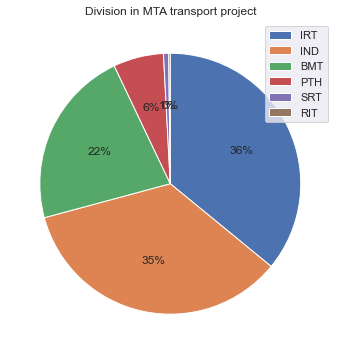

In [199]:
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = 6,6
sorted_counts = df['division'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%.0f%%' );
plt.title('Division in MTA transport project');
plt.legend(sorted_counts.index);

##### The biggest division is IRT Interborough Rapid Transit Company

#### The most repeted stations in MTA data set

In [200]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 216
    s = 70
    l = int(100.0 * float(random_state.randint(50, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [201]:
text=" ".join(df["station"])

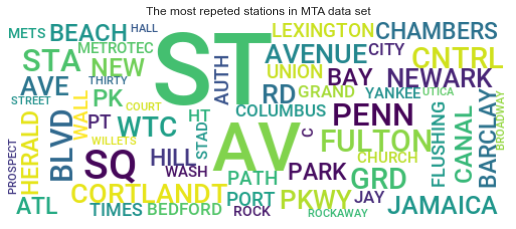

In [202]:
plt.rcParams['figure.figsize'] =9, 4
wordcloud = WordCloud(font_path="Roboto-Medium.ttf",max_font_size=100, max_words=60, background_color="white",width=500, height=200,collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most repeted stations in MTA data set")
plt.show();

##### The most reapeted station is ST

#### The number of weekly entreis in million
#### The busiest station with the weekly entries

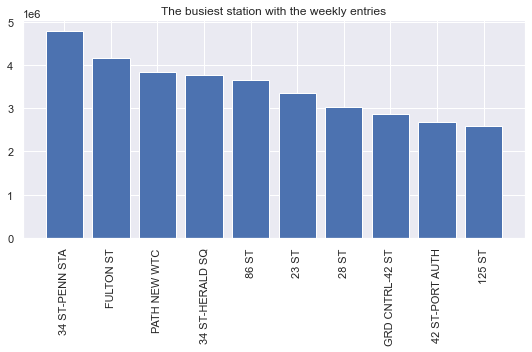

In [203]:
plt.rcParams['figure.figsize'] =9, 4

plt.bar(x=station_totals['station'][:10], height=station_totals['daily_entries'][:10])

plt.xticks(rotation=90)
plt.title('The busiest station with the weekly entries');

##### The busiest station is 34-ST-PENNSTA

#### Rush hours

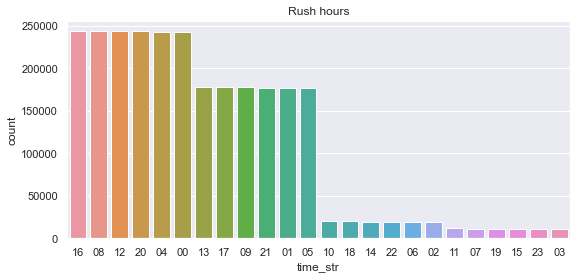

In [204]:
plt.rcParams['figure.figsize'] =9, 4
sns.countplot(data=df, x='time_str',order = df['time_str'].value_counts().index)
plt.title('Rush hours');

##### The peek hours are 12,4,6 AM
##### The peek hours are 12,4,8 PM

#### Rush months

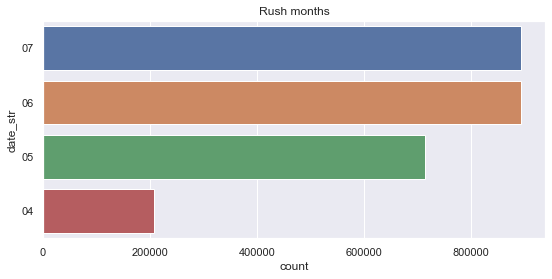

In [205]:
plt.rcParams['figure.figsize'] =9, 4
sns.countplot(data=df, y='date_str',order = df['date_str'].value_counts().index)
plt.title('Rush months');

##### The busiest month is July of 2021